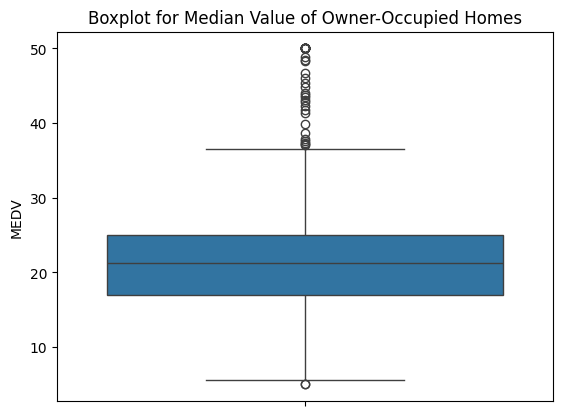

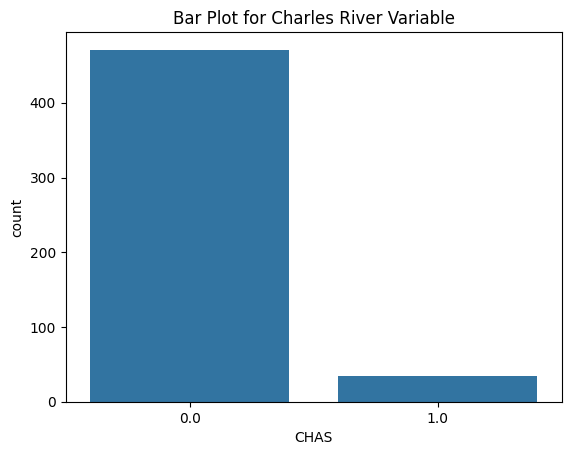

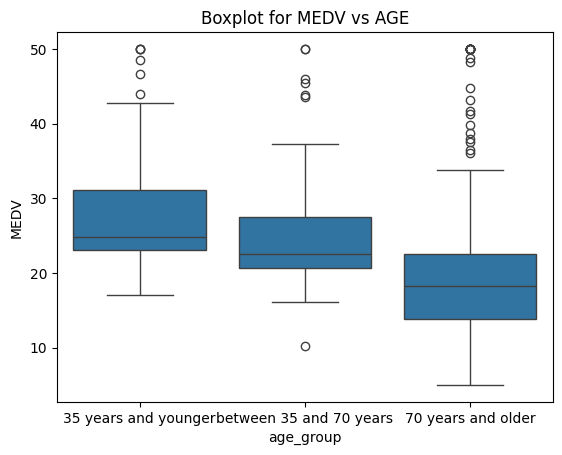

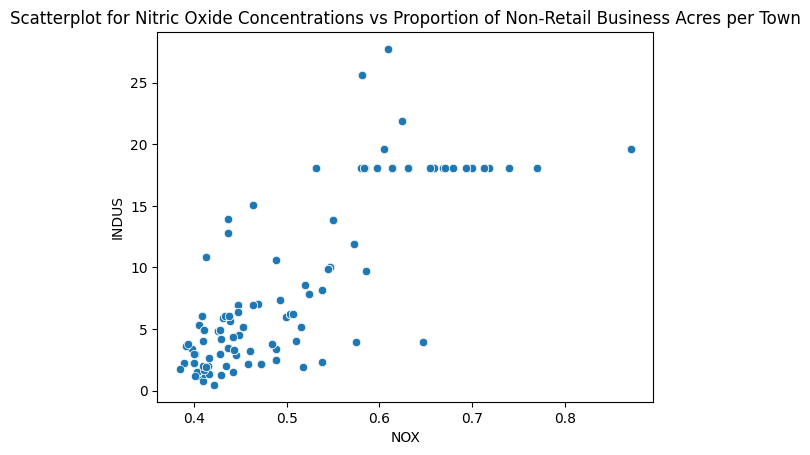

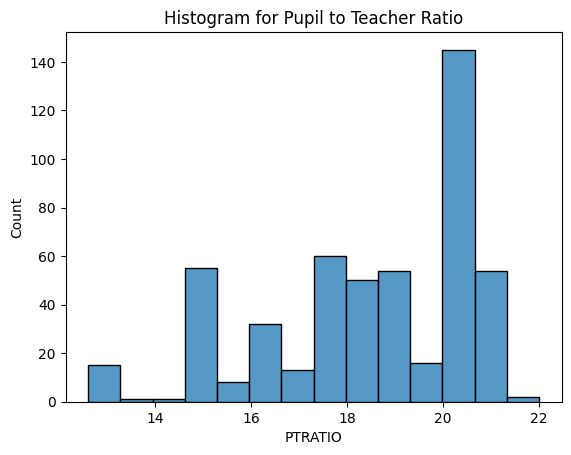

T-statistic: -3.996437466090509, P-value: 7.390623170519905e-05
F-statistic: 36.40764999196599, P-value: 1.7105011022702984e-15
Pearsons correlation: 0.7636514469209157
Coefficient: [[1.09161302]]


In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression

# Task 3 Load the dataset
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df = pd.read_csv(boston_url)

# Task 4: Generate Descriptive Statistics and Visualizations

# Boxplot for the "Median value of owner-occupied homes"
sns.boxplot(y='MEDV', data=boston_df)
plt.title('Boxplot for Median Value of Owner-Occupied Homes')
plt.show()

# Bar plot for the Charles river variable
sns.countplot(x='CHAS', data=boston_df)
plt.title('Bar Plot for Charles River Variable')
plt.show()

# Boxplot for the MEDV variable vs the AGE variable
boston_df['age_group'] = pd.cut(boston_df['AGE'], bins=[0,35,70,100], labels=['35 years and younger', 'between 35 and 70 years', '70 years and older'])
sns.boxplot(x='age_group', y='MEDV', data=boston_df)
plt.title('Boxplot for MEDV vs AGE')
plt.show()

# Scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town
sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
plt.title('Scatterplot for Nitric Oxide Concentrations vs Proportion of Non-Retail Business Acres per Town')
plt.show()

# Histogram for the pupil to teacher ratio variable
sns.histplot(boston_df['PTRATIO'])
plt.title('Histogram for Pupil to Teacher Ratio')
plt.show()

# Task 5: Use the appropriate tests to answer the questions provided

# T-test for independent samples
chas0 = boston_df[boston_df['CHAS'] == 0]['MEDV']
chas1 = boston_df[boston_df['CHAS'] == 1]['MEDV']
t_stat, p_val = stats.ttest_ind(chas0, chas1)
print(f'T-statistic: {t_stat}, P-value: {p_val}')

# ANOVA
f_stat, p_val = stats.f_oneway(boston_df[boston_df['age_group'] == '35 years and younger']['MEDV'],
                               boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV'],
                               boston_df[boston_df['age_group'] == '70 years and older']['MEDV'])
print(f'F-statistic: {f_stat}, P-value: {p_val}')

# Pearson Correlation
corr, _ = stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
print(f'Pearsons correlation: {corr}')

# Regression analysis
X = boston_df['DIS'].values.reshape(-1,1)
y = boston_df['MEDV'].values.reshape(-1,1)
reg = LinearRegression().fit(X, y)
print(f'Coefficient: {reg.coef_}')
